In [7]:
from boundmixofgaussians import findpeak, compute_sum, compute_grad
import numpy as np
np.set_printoptions(suppress=True,precision=6)
import matplotlib.pyplot as plt
%matplotlib inline
from GPAdversarialBound import getallchanges, zeromean_gaussian, getbound, AdversBound, compute_bounds
from GPAdversarialBound.logistic import get_logistic_result
from GPAdversarialDatasets import getMNISTexample, getbankexample, getcreditexample, getspamexample,getsynthexample

# from GPAdversarialBound.test import testing
# testing()

## MNIST Demo

In [5]:
trainingN = 100
testN = 200
fullX,Y = getMNISTexample(scalingfactor=4,Ntraining=trainingN+testN,splittype='35') #4
keep = np.max(fullX,0)>50 #150
X = fullX[:,keep]
X=X-np.min(X,0)
X=X/np.max(X,0)
X = X*1.0
Y = Y*1.0
Y[Y==0]=-1
Xtest = X[trainingN:,:]
Ytest = Y[trainingN:,:]
Xtrain = X[0:trainingN,:]
Ytrain = Y[0:trainingN,:]

Comparing 3 vs 5


Comparing sparse approximation with basic result

reconstraining parameters gp_classification.rbf.variance
reconstraining parameters sparse_gp.rbf.variance
reconstraining parameters gp_classification.rbf.variance


0.625
[2.274482]
0.6
[1.428104]


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 4.,
        2., 5.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
        2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8]),
 <a list of 1 Patch objects>)

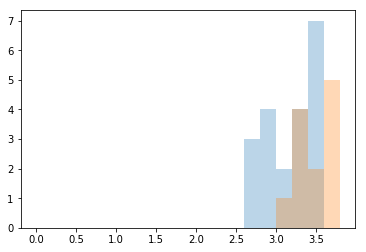

In [6]:
results, _, _, accuracy, abCI = compute_bounds(Xtrain,Ytrain,Xtest,Ytest,1, 4, 1.0, 0.5, 0.0001,2)
print(accuracy)
print(np.diff(abCI))
plt.hist([np.max(res[0]) for res in results],bins=np.arange(0,4,0.2),alpha=0.3)

results, _, _, accuracy, abCI = compute_bounds(Xtrain,Ytrain,Xtest,Ytest,1,False, 1.0, 0.5, 0.0001,2)
print(accuracy)
print(np.diff(abCI))
plt.hist([np.max(res[0]) for res in results],bins=np.arange(0,4,0.2),alpha=0.3,histtype='stepfilled')

In [13]:
logres = get_logistic_result(Xtrain,Ytrain,Xtest,Ytest)
#print("C, Score, cumulativelatents[0], cumulativelatents[1], cumulativelatents[2], cumulativelatents[3], cumulativelatents[4], ci, pixelsneeded")
#for r in logres:
#    print("%0.2f, %0.2f, %0.2f, %0.2f, %0.2f, %0.2f, %0.2f, %0.2f, %d" % tuple(r))

The distance between the 5th and 95th percentile training points is reported above in [brackets]. Both computations seem to end up above these thresholds.

There is an additional process in which the largest results are recomputed with a tighter bound:

reconstraining parameters gp_classification.rbf.variance
reconstraining parameters sparse_gp.rbf.variance


2.6079 --> 1.3344
1.3344 2.2882 2.5983
2.5983 --> 1.3700
1.3344 2.2200 2.5932
2.5932 --> 1.3555
1.3344 2.1512 2.5909
2.5909 --> 1.3451
1.3344 2.0820 2.5612
2.5612 --> 1.4119
1.3344 2.0181 2.5571
2.5571 --> 1.5164
1.3344 1.9603 2.5452
2.5452 --> 1.3643
1.3344 1.8947 2.4514
2.4514 --> 1.7524
1.3344 1.8559 2.4413
2.4413 --> 1.3664
1.3344 1.7962 2.3977
2.3977 --> 1.7143
1.3344 1.7582 2.3606
0.7


(array([0., 0., 0., 0., 0., 0., 6., 2., 2., 2., 2., 4., 0., 0., 0., 0., 0.,
        0., 0.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
        2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8]),
 <a list of 19 Patch objects>)

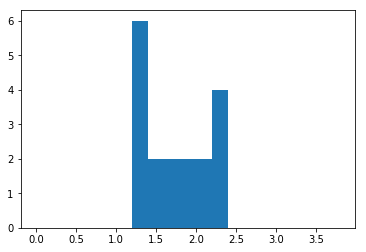

In [13]:
results, _, _, accuracy, abCI = compute_bounds(Xtrain,Ytrain,Xtest,Ytest,1,4, 1.0, 0.5, 0.0001,2,50,2,(7, 10))
print(accuracy)
plt.hist([np.max(res[0]) for res in results],bins=np.arange(0,4,0.2))

In [15]:
print(np.diff(abCI))

[2.730865]


In the above example all the possible paths considered are now below this threshold, so we know at least two pixels need changing.